<a href="https://colab.research.google.com/github/anastasiarenata1/deeplearning/blob/main/ResNet-50_Transfer_Learning_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 5787: Deep Learning Homework 3
### Renata Anastasia (ra568)
### Due April 14, 2023

##1. Problem 1 : Batch Norm

BatchNorm is a technique to normalize the input of each layer of neural network to reduce the impact of internal covariate shift 

**a. Discuss the pros and cons of using BatchNorm**

Pros:
*   Speed up convergence by reducing impact of internal covariate shfft
*   Better model generalization and prevent overfitting by adding noise to the input distribution
*   Reducing sensitivity to the choice of hyperparameters

Cons:
*   Increase computational complexity due to normalization input of each layer that can slow down training speed
*   Require additional memory to store mean and standard deviation of each batch
*   Since BatchNorm is going to normalize input in minibatches, choice of batch size will determine the effectiveness of BatchNorm


**b.  When does BatchNorm fail? Discuss alternatives and their pros and cons.**

BatchNorm will fail or become less effective when this condition occurs:

1. Wrong batch size: If we choose a wrong batch size where the size is too small, the statistics to normalize the input (mean and variance) may be noisy.
2. Training data is not identically and independently distributed (iid): As we are going to normalize data in each batch, the mean and variance that we use have to accurately represenet the data.
3. High-dimensional data: If the data has a high dimensionality, mean and variance computed may not capture distribution of the data.
4. Transfer learning: When we want to use transfer learning, a pre-trained model is fine-tuned on a new task. Therefore, the statistics of pre-trained model may not be appropriate for a new task.
5. RNN: Since RNN works for sequence of data, batch normalization may not work since statistics over different sequences may be significantly different.

Other alternatives that we can do for batch normalization are:
1. Layer normalization: normalize activations of each layer instead of each batch. Pros are it is easy to parallelize and widely used in Transformers. However, it learns slower
2. Instance normalization: normalize features across each instance instead of each batch. Pros is it doesn't depend on batch size and effective for image-to-image translation, however it might not perform well for some cases and can be slower than BatchNorm.
3. Group normalization: normalize that divide the channels into groups and normalize each group separately. The pros are it is faster than BatchNorm and  shows better generalization. However, it's not effective for large batch size.


**c. What properties would an ideal normalization method have?**
1. Effective: Normalization method should be effective to reduce covariate shift and should improve model performance
2. Robust: Normalization method should be robust across different types of input and architectures
3. Scalable: Normalization method should be applicable to large datasets or high dimentional feature spaces
4. Non-destructive: Normalization shouldn't change the essence of input data (such as distribution, range)


Note: This problem is answered with the help of ChatGPT, Prof Alex's slides, and other [resources](https://towardsdatascience.com/different-normalization-layers-in-deep-learning-1a7214ff71d6)

##2. Problem 2 : Using a Pre-Trained CNN

* Use PyTorch and use CNN that has been trained on ImageNet-1K (developed from 2014 onwards). 
* CNN needs to produce d-dimensional embeddings that are fed into the 1000-way output layer, where d is typically 512, 2048, or 4096

###Part 1: Using Pre-Trained Deep CNN

Output the top-3 predicted categories and the probabilities. State the pre-trained CNN model that you used.

In this part, I use pre-trained ResNet-50 CNN model since this model is going to be used for transfer learning with embeddings.

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

In [2]:
#Load pre-train ResNet50
model= models.resnet50(pretrained=True)
model.eval()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
#Image Transformation
transform= transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224),
                               transforms.ToTensor(), transforms.Normalize( mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PAWbjY6bbmQqtnxGlcFY2JVxlHujWqwS
To: /content/peppers.jpg
100% 288k/288k [00:00<00:00, 133MB/s]


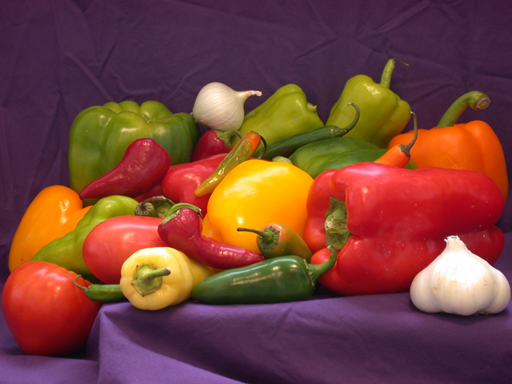

In [5]:
#Load Image
! gdown --id 1PAWbjY6bbmQqtnxGlcFY2JVxlHujWqwS
image= Image.open('peppers.jpg')
image

In [6]:
#Transform image and unsqueezing tensor and add extra dimension to represent batch of images for ResNet50 input
img_tensor= transform(image).unsqueeze(0)


In [7]:
#Forward hook function
def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach().numpy()
    return hook

#Define the layers from which we want to extract feature maps
early_layers = ['conv1', 'layer1.0.conv1', 'layer1.0.conv2', 'layer1.1.conv1', 'layer1.1.conv2']
mid_layers = ['layer2.2.conv1', 'layer2.2.conv2', 'layer2.2.conv3', 'layer3.0.conv1', 'layer3.0.conv2']
late_layers = ['layer3.0.conv3', 'layer3.5.conv1', 'layer3.5.conv2', 'layer3.5.conv3', 'layer4.0.conv1']

activations = {}

#Register forward hooks on the desired layers
for name, layer in model.named_modules():
    if name in early_layers + mid_layers + late_layers:
        layer.register_forward_hook(get_activation(name))

In [8]:
#Forward pass through pre-train model to extract features
output= model(img_tensor)

#Extract embeddings
embeddings= output.detach().squeeze().numpy()

In [9]:
!pip install wget
import wget

url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
filename = wget.download(url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=050f7e601a7c823d21fc11d7aa9facabefb1a36a24a0781e134d5a0a9d833ec1
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [10]:
#Top 3 predicted categories
# Load the ImageNet labels
with open("imagenet_classes.txt", "r") as f:
    categories = [line.strip() for line in f.readlines()]

# Top 3 predicted categories
probability, index = torch.topk(nn.functional.softmax(output, dim=1), 3)

print("Top predicted categories:")
for i in range(3):
    print(f"{i+1}. {categories[index[0][i]]}: {probability[0][i].item()*100:.2f}%")

Top predicted categories:
1. bell pepper: 99.99%
2. cucumber: 0.01%
3. grocery store: 0.00%


Resource from https://pytorch.org/hub/pytorch_vision_resnet/

###Part 2: Visualizing Features Maps

Visualize the feature maps in the network as images
1. Choose five interesting feature maps from early in the network, five from the the middle of the network, and and five close to the end of the network. 
2. Display them to us and discuss
the structure of the feature maps. 

Note: Try to find some that are interpretable, and discuss the
challenges in doing so

In [11]:
import matplotlib.pyplot as plt

In [12]:
#Extract activations
early_maps = [activations[name] for name in early_layers[:5]]
mid_maps = [activations[name] for name in mid_layers[:5]]
late_maps = [activations[name] for name in late_layers[:5]]

In [13]:
# Get shape size of each feature map
for i, fmap in enumerate(early_maps):
    print(f"Early feature map {i+1} shape size: {fmap.shape}")
for i, fmap in enumerate(mid_maps):
    print(f"Mid feature map {i+1} shape size: {fmap.shape}")
for i, fmap in enumerate(late_maps):
    print(f"Late feature map {i+1} shape size: {fmap.shape}")


Early feature map 1 shape size: (1, 64, 112, 112)
Early feature map 2 shape size: (1, 64, 56, 56)
Early feature map 3 shape size: (1, 64, 56, 56)
Early feature map 4 shape size: (1, 64, 56, 56)
Early feature map 5 shape size: (1, 64, 56, 56)
Mid feature map 1 shape size: (1, 128, 28, 28)
Mid feature map 2 shape size: (1, 128, 28, 28)
Mid feature map 3 shape size: (1, 512, 28, 28)
Mid feature map 4 shape size: (1, 256, 28, 28)
Mid feature map 5 shape size: (1, 256, 14, 14)
Late feature map 1 shape size: (1, 1024, 14, 14)
Late feature map 2 shape size: (1, 256, 14, 14)
Late feature map 3 shape size: (1, 256, 14, 14)
Late feature map 4 shape size: (1, 1024, 14, 14)
Late feature map 5 shape size: (1, 512, 14, 14)


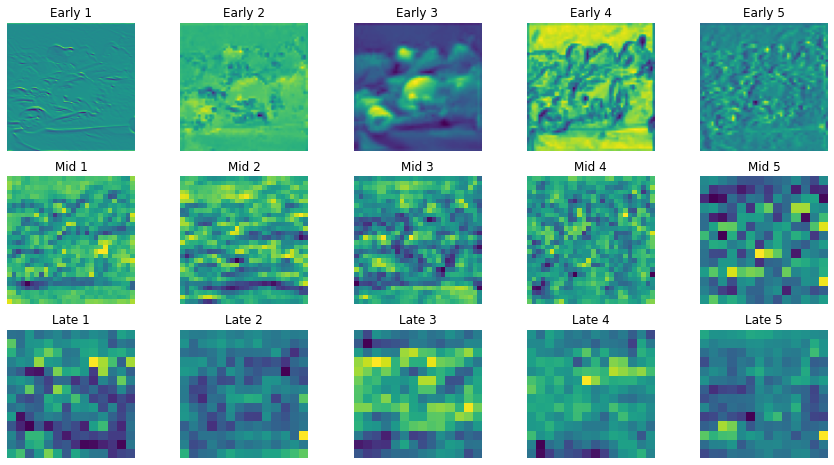

In [14]:
# Normalize and display the feature maps
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 8))
for i in range(5):
    #Normalize the feature maps
    early_norm = (early_maps[i][0] - np.min(early_maps[i][0])) / (np.max(early_maps[i][0]) - np.min(early_maps[i][0]))
    mid_norm = (mid_maps[i][0] - np.min(mid_maps[i][0])) / (np.max(mid_maps[i][0]) - np.min(mid_maps[i][0]))
    late_norm = (late_maps[i][0] - np.min(late_maps[i][0])) / (np.max(late_maps[i][0]) - np.min(late_maps[i][0]))
    
    #Display the feature maps
    axes[0,i].imshow(early_norm[i])
    axes[0,i].axis('off')
    axes[0,i].set_title('Early {}'.format(i+1))
    
    axes[1,i].imshow(mid_norm[i])
    axes[1,i].axis('off')
    axes[1,i].set_title('Mid {}'.format(i+1))
    
    axes[2,i].imshow(late_norm[i])
    axes[2,i].axis('off')
    axes[2,i].set_title('Late {}'.format(i+1))

plt.show()

Looking at the structure of the maps, layer1 (early) gives the edges and the texture of the photo. The structure of the images can be recognized. Meanwhile layer2 (mid) give a more abstract features and layer3 (late) gives a higher-level abstract features. Both of these mid and late layers are uninterpretable compared to early layer.

##3. Problem 3 : Transfer learning with a pre-trained CNN

Rather than using the final ‘softmax’ layer,  use the CNN as a feature extractor to classify the Pets dataset. 
1. For each image, grab features from the last hidden layer of the neural network, which will be the layer before the 1000-dimensional output layer (around 500–
6000 dimensions). 
2. Resize the images to a size compatible with your network (usually 224 × 224 × 3)
3. Grab the output just after the last hidden layer or after global
pooling
4. After extracting these features for all of the images in the dataset, normalize to unit length by dividing by the L2 norm. 
5. Train a linear classifier of your choice1 with the training CNN features, and then classify the test CNN features. Report mean-per-class accuracy and discuss the classifier you used.

Load data source code: https://jovian.com/aakashns/transfer-learning-pytorch

In [15]:
#Load data and extract it
import os
import torch.optim as optim
import torchvision.datasets as datasets
!pip install jovian --upgrade --quiet
from torchvision.datasets.utils import download_url

download_url('https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz', '.')
import tarfile
with tarfile.open('./oxford-iiit-pet.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')
from torch.utils.data import Dataset

data_dir = './data/oxford-iiit-pet/images'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


  0%|          | 0/811706944 [00:00<?, ?it/s]

In [16]:
#Classification breed name
def parse_breed(fname):
    parts = fname.split('_')
    return ' '.join(parts[:-1])

#Convert image to RGB
def open_image(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')

In [17]:
#Load dataset
def load_pet_dataset(root, transform):
    files = [fname for fname in os.listdir(root) if fname.endswith('.jpg')]
    classes = list(set(parse_breed(fname) for fname in files))
    def parse_class_idx(fname):
        return classes.index(parse_breed(fname))

    dataset = [(transform(open_image(os.path.join(root, fname))), parse_class_idx(fname)) for fname in files]
    return dataset

#Data transformation
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224), #Resize image tp 224 x 224 x 3 for Resnet-50 input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [18]:
dataset= load_pet_dataset(data_dir, transform)
len(dataset)

7390

In [19]:
#Split test and train dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

train_index, test_index= train_test_split(list(range(len(dataset))), test_size=0.2)
train_sample, test_sample= torch.utils.data.SubsetRandomSampler(train_index), torch.utils.data.SubsetRandomSampler(test_index)
train_loader = DataLoader(dataset, batch_size=32, sampler=train_sample)
test_loader = DataLoader(dataset, batch_size=32, sampler=test_sample)

In [20]:
#Check dimension of last layer
last_hidden_layer = list(model.children())[-1]
last_layer_dim = last_hidden_layer.out_features
print(last_layer_dim)

1000


In [21]:
#Remove last layer for classifier to classify Pet dataset
model = nn.Sequential(*list(model.children())[:-1])

#Check dimension using input sample
input_tensor = torch.randn(1, 3, 224, 224)
output = model(input_tensor)
print(output.shape)

torch.Size([1, 2048, 1, 1])


In [28]:
import torch.nn.functional as F

In [31]:
#Function to extract features
def extract_features(loader, model):
  model.eval()
  features= []
  labels= []
  with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(loader):
            inputs = F.interpolate(inputs, size=224) # Resize the input images to 224x224
            features_batch = model(inputs).reshape(inputs.size(0), -1)
            features.append(features_batch.cpu())
            labels.append(targets)

  features = torch.cat(features, dim=0)
  labels = torch.cat(labels, dim=0)
  return features, labels

In [32]:
train_features, train_labels= extract_features(train_loader, model)
test_features, test_labels= extract_features(test_loader, model)

In [34]:
#Normalize L2 norm
train_features_norm= train_features/ np.linalg.norm(train_features, axis=1, keepdims= True)
test_features_norm= test_features/ np.linalg.norm(test_features, axis=1, keepdims= True)


In [35]:
#Use SVM for linear classifier
from sklearn.svm import LinearSVC
svm= LinearSVC()
svm.fit(train_features_norm, train_labels)
accuracy = svm.score(test_features_norm, test_labels)
print("Mean-per-class accuracy:", accuracy)

Mean-per-class accuracy: 0.9377537212449256
